In [30]:
# Linear Discriminant Analysis (LDA)

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [31]:

def lda(x_train,y_train,  x_test, n):
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
    lda = LDA(n_components=n)
    xTrain =lda.fit_transform(x_train, y_train )
    xTest= lda.transform(x_test)
    return xTrain, xTest

def Split_Scaler(indep,dep):
    x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.30,random_state=0)
    scX=StandardScaler()
    x_train=scX.fit_transform(x_train)
    x_test=scX.transform(x_test)
    return x_train,x_test,y_train,y_test, scX

def cm_predition(classifier, x_test):
    y_pred=classifier.predict(x_test)

    #making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,y_pred)

    # making Classification Report
    from sklearn.metrics import classification_report
    clf_report=classification_report(y_test,y_pred)

    # finding the accuracy score
    from sklearn.metrics import accuracy_score
    accuracy_score=accuracy_score(y_test,y_pred)
    
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred

def logistic(x_train,y_train,x_test):
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression(random_state=0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 
    
def svm_linear(x_train,y_train,x_test):
    from sklearn.svm import SVC
    classifier=SVC(kernel='linear',random_state=0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 
    
def svm_nonlinear(x_train,y_train,x_test):
    from sklearn.svm import SVC
    classifier=SVC(kernel='rbf', random_state=0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 
    
def random(x_train,y_train,x_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test ,y_pred 

def Decision(x_train,y_train,x_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 

def knn(x_train,y_train,x_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 

def navie(x_train,y_train,x_test):
    from sklearn.naive_bayes import GaussianNB
    classifier=GaussianNB()
    classifier.fit(x_train,y_train)
    classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = cm_predition(classifier,x_test)
    return classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred 

# Displaying the values in the tabular frame

def LDA_classification(acc_logistic, acc_svmL, acc_svmNL, acc_knn, acc_rf, acc_des, acc_nav):
    
    table=pd.DataFrame(index=["LDA"],columns=["Logistic","SVM_linear","SVM_Nonlinear","KNN","Random","Decision","Navie"])
    for number,idex in enumerate(table.index):
         table['Logistic'][idex]= acc_logistic[number]
         table['SVM_linear'][idex]= acc_svmL[number]
         table['SVM_Nonlinear'][idex]= acc_svmNL[number]
         table['KNN'][idex]= acc_knn[number]
         table['Random'][idex]= acc_rf[number]
         table['Decision'][idex]= acc_des[number]
         table['Navie'][idex]= acc_nav[number]
         
    return table




In [32]:
dataset=pd.read_csv("Wine.csv",index_col=None)
df1=dataset  

#Convert categorical variable into dummy/indicator variables.
df1=pd.get_dummies(df1,drop_first=True,dtype=int)
df1

# separation of independent and dependent variables
indep=df1.drop("Customer_Segment",axis=1)
dep=df1["Customer_Segment"]

#separate the train and test data adn apply StandardScalar techniques to standardize feaures...
x_train,x_test,y_train,y_test,scX= Split_Scaler(indep, dep)

print (" before LDA: ",x_train.shape, x_test.shape)


# Applying LDA...
xTrain, xTest = lda(x_train, y_train, x_test, 2)



acc_logistic=[]
acc_svmL=[]
acc_svmNL=[]
acc_knn=[]
acc_nav=[]
acc_des=[]
acc_rf=[]

print (" After LDA: ", xTrain.shape,xTest.shape)


 before LDA:  (124, 13) (54, 13)
 After LDA:  (124, 2) (54, 2)


Text(0, 0.5, 'LDA 2')

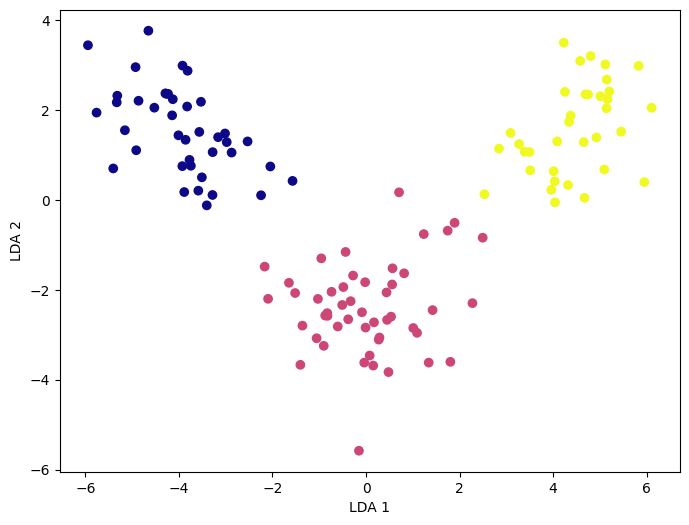

In [33]:
# Great! we have reduced the features from 4 dimention to 2 dimention Let's plot those data points...
plt.figure(figsize=(8,6))
plt.scatter(xTrain[:,0],xTrain[:,1], c=y_train, cmap="plasma")
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")

In [34]:
# create, train and prdict the models using diff algorithms...
classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = logistic(xTrain,y_train,xTest)
acc_logistic.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = svm_linear(xTrain,y_train,xTest)
acc_svmL.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = svm_nonlinear(xTrain,y_train,xTest)
acc_svmNL.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = knn(xTrain,y_train,xTest)
acc_knn.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred= navie(xTrain,y_train,xTest)
acc_nav.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = Decision(xTrain,y_train,xTest)
acc_des.append(accuracy_score)

classifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = random(xTrain,y_train,xTest)
acc_rf.append(accuracy_score)

result= LDA_classification(acc_logistic,acc_svmL,acc_svmNL,acc_knn,acc_rf,acc_des,acc_nav)



/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_1858/697126600.py:87: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  table['Logistic'][idex]= acc_logistic[number]
/var/folders/1s/70xy4dvs6mn0zqfz6nvhbypw0000gn/T/ipykernel_1858/6971

In [35]:
result # n=2

,Logistic,SVM_linear,SVM_Nonlinear,KNN,Random,Decision,Navie
LDA,1.0,1.0,1.0,0.981481,0.981481,0.981481,0.981481


In [36]:
#### Accuracy score for the Logistic,SVM_linear	SVM_Nonlinear, classfication model is high... so will save the model for deployment....

In [37]:
sclassifier,cm,clf_report,accuracy_score,x_test,y_test,y_pred = svm_nonlinear(xTrain,y_train,xTest)


In [38]:
#### Accuracy score for the Logistic,SVM_linear	SVM_Nonlinear, classfication model is high... so will save the model for deployment....


In [39]:
# Save the SVM_Nonlinear classfication model

pickle.dump(svm_linear_classifier,open("Finalized_svm_Nonlinear_Model",'wb'))

In [40]:
pickle.dump(scX,open("SCX.pk",'wb'))

In [41]:
# Create the list of column names using a simple for loop
column_names = []
for i in range(1, xTrain.shape[1] + 1 ):
    column_names.append(f'LD{i}')

# Create the DataFrame with the generated column names
kpca_features = pd.DataFrame(xTrain, columns=column_names)


#kpca_features= pd.DataFrame(xTrain, columns = [f'PC{i}' for i in range(1, xTrain.shape[1] +1) ])
                                                  
# Show the transformed features
print(kpca_features.head())

        LD1       LD2
0 -5.402298  0.702970
1  0.480463 -3.829772
2  4.802378  3.204870
3  3.388790  1.076560
4 -0.736496 -2.042936
